## 1. Data Visualization 
### full dataset

emotion
neutral      6717
happiness    5309
HAPPINESS     387
surprise      356
anger         228
DISGUST       195
NEUTRAL       151
SADNESS       144
sadness       124
ANGER          24
disgust        13
fear           13
SURPRISE       12
contempt        9
FEAR            8
Name: count, dtype: int64


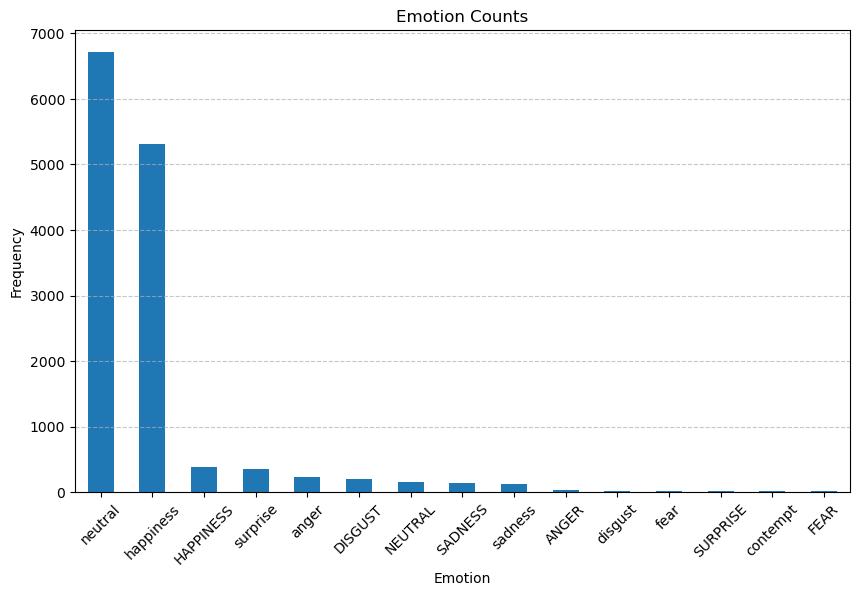

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('data/legend.csv')

emotion_counts = df['emotion'].value_counts()

print(emotion_counts)

plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar')
plt.title('Emotion Counts')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 500_Pics

emotion
happiness    197
anger        115
neutral       84
fear          54
sad           50
Name: count, dtype: int64


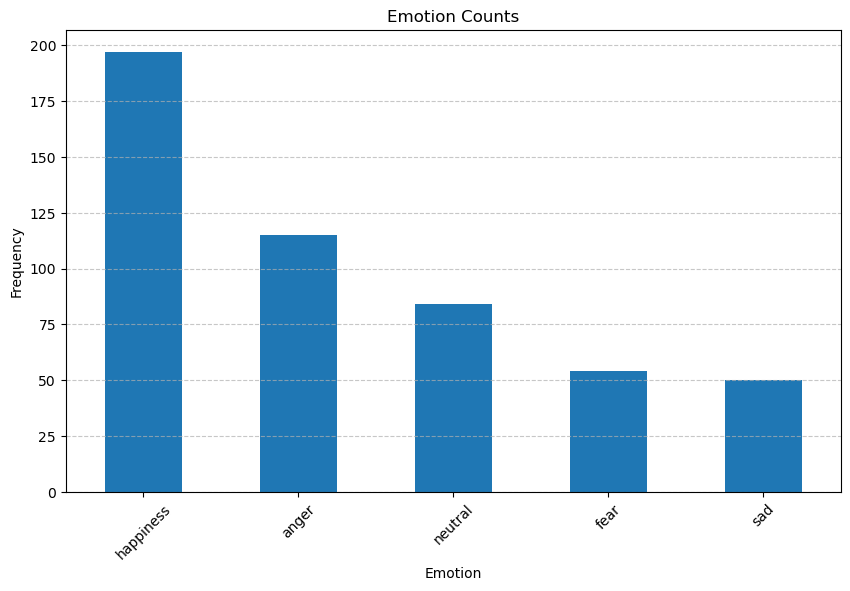

In [2]:
df = pd.read_csv('data/500_picts_satz.csv')

emotion_counts = df['emotion'].value_counts()

print(emotion_counts)

plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar')
plt.title('Emotion Counts')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 2. Train the model

In [15]:
import os
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Path
csv_file = 'data/500_picts_satz.csv' 
image_dir = 'images/'         

#Read
data = pd.read_csv(csv_file, header=None, names=['user_id', 'image', 'emotion'])

# resize the dataset (I didnt find the resolution of this dataset, so i will resize them to 224x224)
image_size = (224, 224) 
images = []
labels = []
for _, row in data.iterrows():
    image_path = os.path.join(image_dir, row['image'])
    if os.path.exists(image_path):
        img = cv2.imread(image_path)
        img = cv2.resize(img, image_size) / 255.0  
        images.append(img)
        labels.append(row['emotion'])

#convert to numpy arrays
images = np.array(images)
labels = pd.get_dummies(labels).values 

[[False  True False False False]
 [False False  True False False]
 [False False False  True False]
 ...
 [False False False  True False]
 [False False False  True False]
 [False False  True False False]]
['fear' 'happiness' 'neutral' 'anger' 'sad']


# Visualize the data:

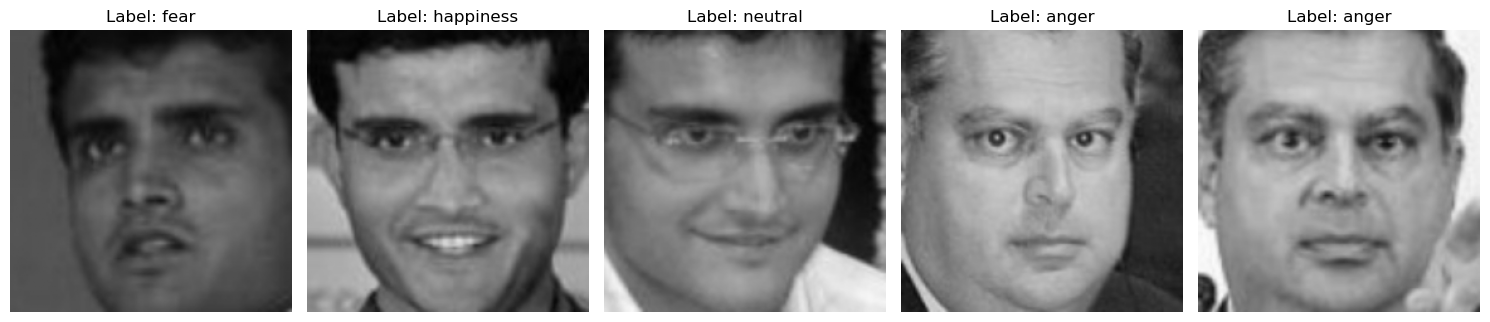

In [14]:
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i])
    plt.title(f"Label: {data['emotion'][i+1]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [5]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# CNN model(it is a demo, more evaluation and fine tune is needed)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.6),  
    layers.Dense(labels.shape[1], activation='softmax')  
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)


Epoch 1/10


2024-12-03 20:08:29.309816: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


10/10 [==============================] - 3s 307ms/step - loss: 1.8961 - accuracy: 0.3156 - val_loss: 1.6105 - val_accuracy: 0.3125
Epoch 2/10
10/10 [==============================] - 3s 289ms/step - loss: 1.5280 - accuracy: 0.3656 - val_loss: 1.5502 - val_accuracy: 0.3125
Epoch 3/10
10/10 [==============================] - 3s 293ms/step - loss: 1.5049 - accuracy: 0.3938 - val_loss: 1.5498 - val_accuracy: 0.3125
Epoch 4/10
10/10 [==============================] - 3s 310ms/step - loss: 1.4732 - accuracy: 0.3812 - val_loss: 1.5359 - val_accuracy: 0.3125
Epoch 5/10
10/10 [==============================] - 3s 297ms/step - loss: 1.4927 - accuracy: 0.3750 - val_loss: 1.5224 - val_accuracy: 0.3625
Epoch 6/10
10/10 [==============================] - 3s 297ms/step - loss: 1.4295 - accuracy: 0.4219 - val_loss: 1.5079 - val_accuracy: 0.3375
Epoch 7/10
10/10 [==============================] - 3s 318ms/step - loss: 1.3538 - accuracy: 0.4313 - val_loss: 1.4831 - val_accuracy: 0.3875
Epoch 8/10
10/10 

# Visulize the performance

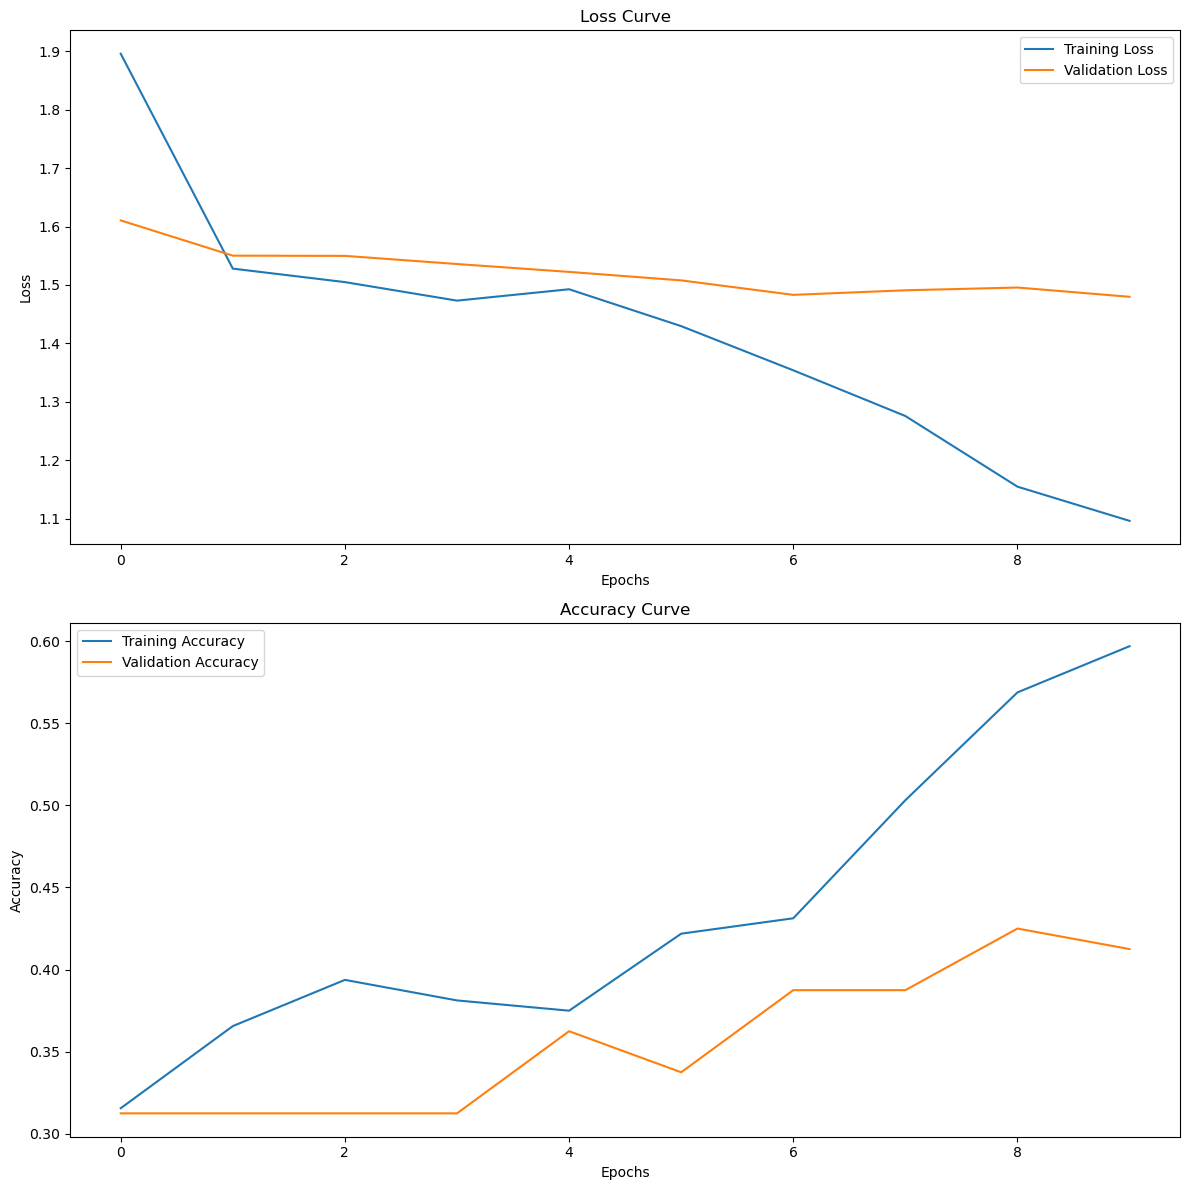

In [6]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

4/4 [==============================] - 0s 55ms/step


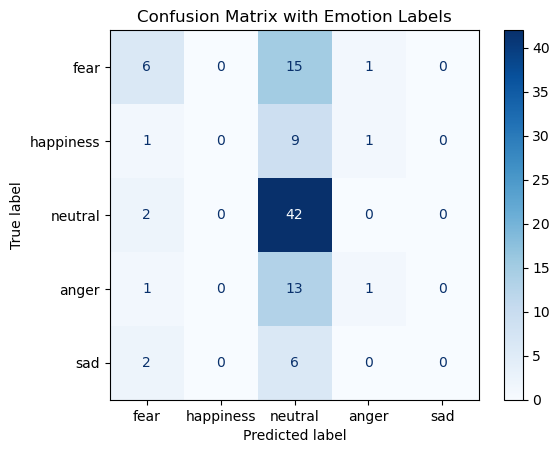

In [17]:
y_pred = model.predict(X_test)
emotion_labels = data[1:]['emotion'].unique()

y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=emotion_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix with Emotion Labels')
plt.show()

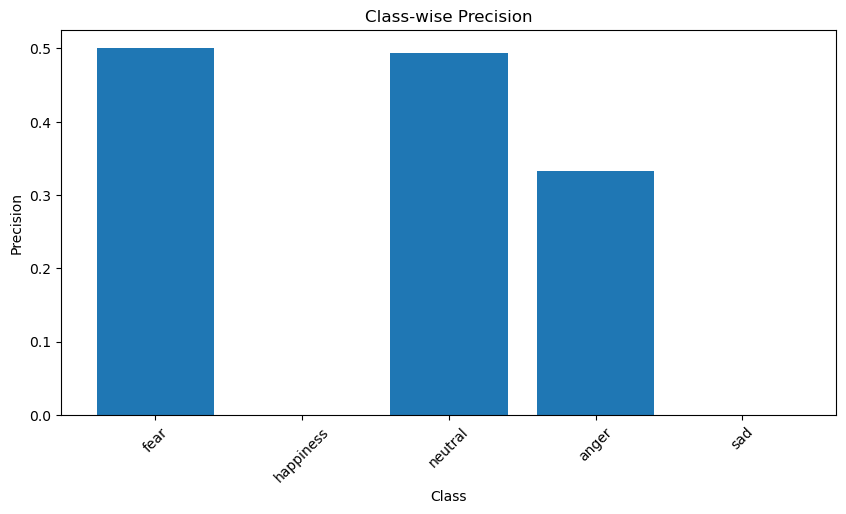

In [21]:
report = classification_report(y_true_classes, y_pred_classes, target_names=emotion_labels, output_dict=True, zero_division=0)
class_precisions = [report[label]['precision'] for label in emotion_labels if label in report]

# Plot class-wise precision
plt.figure(figsize=(10, 5))
plt.bar(emotion_labels, class_precisions)  # Use class labels for the x-axis
plt.title('Class-wise Precision')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.show()